# Mathematical Underpinnings - Lab 4

In [4]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [5]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

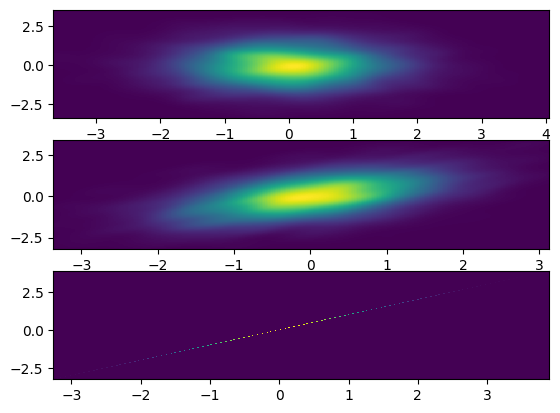

In [93]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [30]:
def discrete(l):
    r = np.digitize(l,np.linspace(np.min(l),np.max(l),11)[:-1])
    return r

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
print(f"0: Pearson: {pearsonr(data_2d[:,0],data_2d[:,1])}, MI: {mutual_info_classif(discrete(data_2d[:,0]).reshape(-1, 1),discrete(data_2d[:,1]))[0]}")
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
print(f"0.5: Pearson: {pearsonr(data_2d[:,0],data_2d[:,1])}, MI: {mutual_info_classif(discrete(data_2d[:,0]).reshape(-1, 1),discrete(data_2d[:,1]))[0]}")
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
print(f"1: Pearson: {pearsonr(data_2d[:,0],data_2d[:,1])}, MI: {mutual_info_classif(discrete(data_2d[:,0]).reshape(-1, 1),discrete(data_2d[:,1]))[0]}")

0: Pearson: PearsonRResult(statistic=-0.05962585054532319, pvalue=0.05944957437210881), MI: 0.006399495517145137
0.5: Pearson: PearsonRResult(statistic=0.5102859268417623, pvalue=2.1140042813025136e-67), MI: 0.12556736831749093
1: Pearson: PearsonRResult(statistic=0.9999999999999999, pvalue=0.0), MI: 1.8130081549537147


#### bp 3)

In [115]:
results_per = {"0":[],"0.5":[],"1":[]}
results_mi = {"0":[],"0.5":[],"1":[]}
for p in [0, 0.5, 1]:
    for i in range(100):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
        per = pearsonr(data_2d[:,0],data_2d[:,1]).statistic
        mi = mutual_info_classif(discrete(data_2d[:,0]).reshape(-1, 1),discrete(data_2d[:,1]))[0]

        results_per[str(p)].append(per)
        results_mi[str(p)].append(mi)

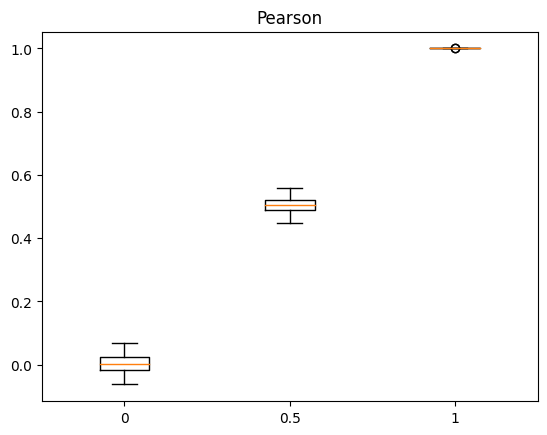

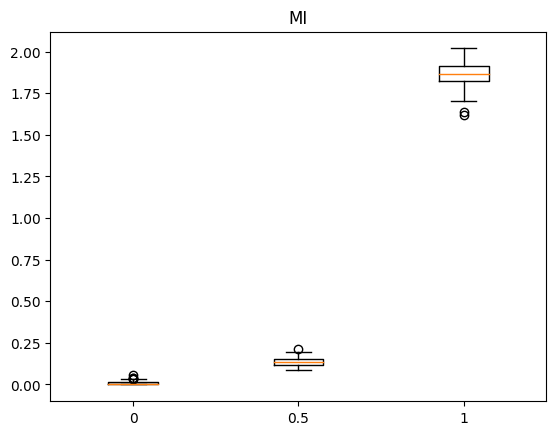

In [124]:
plt.boxplot(pd.DataFrame(results_per),labels=["0", "0.5", "1"])
plt.title("Pearson")

plt.show()
plt.boxplot(pd.DataFrame(results_mi),labels=["0", "0.5", "1"])
plt.title("MI")
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [126]:
mi = []
p = []
p_hat = []
for i in np.linspace(0,1):
    data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, i], [i, 1]]), n)
    mi = mutual_info_classif(discrete(data_2d[:,0]).reshape(-1, 1),discrete(data_2d[:,1]))[0]
    p.append(-np.log(1-i**2)/2)
    per = pearsonr(data_2d[:,0],data_2d[:,1]).statistic
    p_hat.append(-np.log(1-per**2)/2)
    

/tmp/ipykernel_15179/691680184.py:7: RuntimeWarning: divide by zero encountered in log
  p.append(-np.log(1-i**2)/2)
/tmp/ipykernel_15179/691680184.py:9: RuntimeWarning: divide by zero encountered in log
  p_hat.append(-np.log(1-per**2)/2)


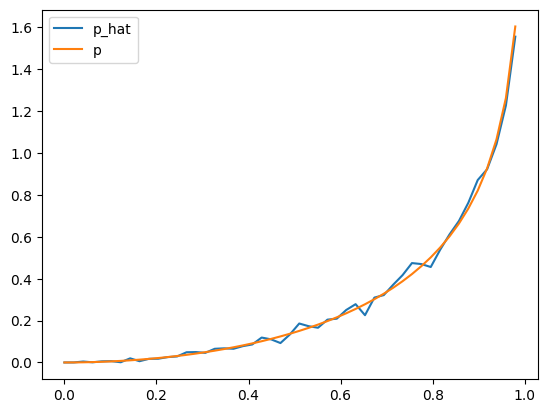

In [131]:
plt.plot(np.linspace(0,1),p_hat,label="p_hat")
plt.plot(np.linspace(0,1),p,label="p")
plt.legend()
plt.show()

### b)

#### bp 1)

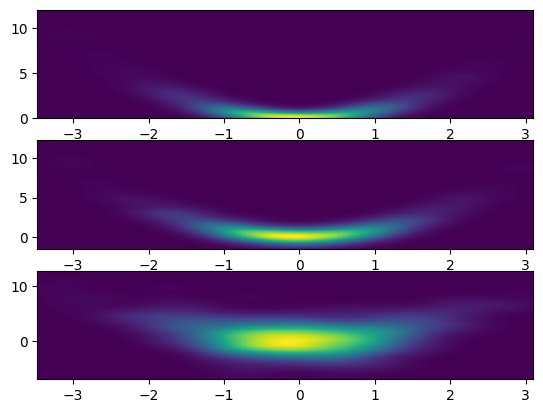

In [6]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [8]:
rho_seq = np.linspace(0, 1, 10)
eps_seq = np.exp(np.linspace(0, 1, 10))
n = 1000
N = 100

cor_pearson_results = np.zeros((N, np.shape(eps_seq)[0]))
mi_results = np.zeros((N, np.shape(eps_seq)[0]))

for i in range(np.shape(rho_seq)[0]):
    eps = eps_seq[i]
    for j in range(N):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, eps, n)

        cor_pearson_results[j, i] = pearsonr(x, y)[0]

        x_bins = np.linspace(x.min(), x.max(), 10)
        y_bins = np.linspace(y.min(), y.max(), 10)

        x_discrete = np.digitize(data_2d[:,0], bins=x_bins)
        y_discrete = np.digitize(data_2d[:,1], bins=y_bins)

        mi_results[j, i] = mutual_info_score(x_discrete, y_discrete)

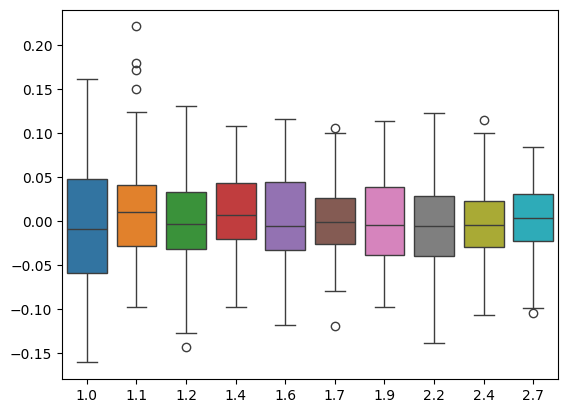

In [9]:
sns.boxplot(cor_pearson_results)
plt.xticks(np.arange(0,10,1), np.round(eps_seq, 1))
plt.show()

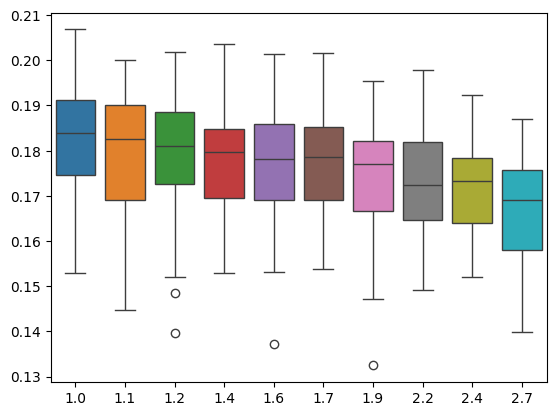

In [10]:
sns.boxplot(mi_results)
plt.xticks(np.arange(0,10,1), np.round(eps_seq, 1))
plt.show()

## Task 2

### a)

In [42]:
def test_asymptotic(X, Y, stat):
    X = discrete(X)
    Y = discrete(Y) 
    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [43]:
def test_permutation(X, Y, B, stat="mi"):
    X = discrete(X)
    Y = discrete(Y) 
    stat_value = mutual_info_score(X, Y)
    
    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

In [44]:
def get_data(rho, n):
    return np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [45]:
x, y = get_data(0, 1000).T
test_asymptotic(x, y, stat="mi")

(76.64379852684262, 0.6163635322844339)

In [46]:
test_asymptotic(x, y, stat="chi2")

(72.6916095299299, 0.7335732029401696)

In [47]:
test_permutation(x,y,100)

(76.64379852684262, 0.44554455445544555)

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [48]:
x, y = get_data(0.5, 1000).T
test_asymptotic(x, y, stat="mi")

(279.8998805802025, 0.0)

In [49]:
test_asymptotic(x, y, stat="chi2")

(833.3628564128308, 0.0)

In [50]:
test_permutation(x,y,100)

(279.8998805802025, 0.009900990099009901)